In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df_pheno_all = pd.read_csv(r"C:\Users\jjjjo\Desktop\BRCA_Pheno.tsv", sep= "\t", index_col= 0)

In [3]:

X = df_pheno_all 

X


,samples,age_at_initial_pathologic_diagnosis,DFI,DFI.time,DSS,DSS.time,gender,histological_type,pathologic_M,pathologic_N,pathologic_T,PFI,PFI.time
sample,,,,,,,,,,,,,
TCGA-B6-A0IC-01,TCGA-B6-A0IC-01,90.0,0.0,1542.0,0.0,1542.0,FEMALE,"Other, specify",MX,NX,T2,0.0,1542.0
TCGA-LL-A6FP-01,TCGA-LL-A6FP-01,90.0,0.0,677.0,0.0,677.0,FEMALE,Infiltrating Lobular Carcinoma,MX,NX,T2,0.0,677.0
TCGA-D8-A1JK-01,TCGA-D8-A1JK-01,90.0,0.0,612.0,0.0,612.0,FEMALE,Infiltrating Ductal Carcinoma,M0,N0,T2,0.0,612.0
TCGA-AC-A3W6-01,TCGA-AC-A3W6-01,90.0,0.0,602.0,0.0,602.0,FEMALE,Infiltrating Lobular Carcinoma,MX,N1,T3,0.0,602.0
TCGA-E2-A9RU-01,TCGA-E2-A9RU-01,90.0,0.0,538.0,0.0,538.0,FEMALE,Infiltrating Ductal Carcinoma,MX,N3a,T2,0.0,538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AN-A0FE-01,TCGA-AN-A0FE-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-AN-A0FG-01,TCGA-AN-A0FG-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BH-A0B2-01,TCGA-BH-A0B2-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.set_option("display.max_columns", 16)


In [5]:
df_clusters = pd.read_excel(r"C:\Users\jjjjo\Desktop\Doktorarbeit\DataSciIntro\DataSci\Notebooks\BRCA_HER2+_Main.xlsx",  index_col = 0)

In [6]:
df_clusters = df_clusters.drop(["histological_type", "samples"], axis = 1)

In [7]:

cluster_pheno = df_clusters.join(X)

In [8]:
cluster_pheno.columns

Index(['IL22RA1', 'IL22RA2', 'IL10RB', 'PVR', 'ER_Status_nature2012',
       'PR_Status_nature2012', 'HER2_Final_Status_nature2012',
       'AJCC_Stage_nature2012', 'OS_event_nature2012', 'OS_Time_nature2012',
       'sample_type', 'Cluster', 'samples',
       'age_at_initial_pathologic_diagnosis', 'DFI', 'DFI.time', 'DSS',
       'DSS.time', 'gender', 'histological_type', 'pathologic_M',
       'pathologic_N', 'pathologic_T', 'PFI', 'PFI.time'],
      dtype='object')

In [9]:
pheno_means = cluster_pheno.groupby("Cluster").mean()

In [10]:
cluster_pheno["pathologic_T"].value_counts()

T2     73
T1c    13
T3     11
T1      6
T4b     5
T4d     1
T2b     1
Name: pathologic_T, dtype: int64

In [11]:
cluster_pheno["pathologic_N"].value_counts()

N1         28
N0         25
N1a        17
N0 (i-)    10
N2a         8
N3a         7
N2          6
NX          3
N1mi        3
N3          2
N1b         1
Name: pathologic_N, dtype: int64

In [12]:
cluster_pheno["pathologic_M"].value_counts()

M0    99
MX    10
M1     1
Name: pathologic_M, dtype: int64

In [13]:
gender_cluster = cluster_pheno.groupby("Cluster")["gender"].value_counts()
gender_cluster

Cluster  gender
0        FEMALE    51
         MALE       4
1        FEMALE    29
2        FEMALE    24
         MALE       2
Name: gender, dtype: int64

In [14]:
pT_cluster = cluster_pheno.groupby("Cluster")["pathologic_T"].value_counts()
pN_cluster = cluster_pheno.groupby("Cluster")["pathologic_N"].value_counts()
pM_cluster = cluster_pheno.groupby("Cluster")["pathologic_M"].value_counts()

In [15]:
pT_cluster

Cluster  pathologic_T
0        T2              35
         T3               6
         T1               5
         T4b              4
         T1c              3
         T2b              1
         T4d              1
1        T2              22
         T1c              4
         T3               2
         T1               1
2        T2              16
         T1c              6
         T3               3
         T4b              1
Name: pathologic_T, dtype: int64

In [16]:
pN_cluster

Cluster  pathologic_N
0        N0              16
         N1              13
         N1a              6
         N2               4
         N2a              4
         N0 (i-)          3
         N1mi             3
         N3a              3
         NX               3
1        N1               8
         N1a              8
         N0 (i-)          5
         N2a              3
         N2               2
         N3               2
         N0               1
2        N0               8
         N1               7
         N3a              4
         N1a              3
         N0 (i-)          2
         N1b              1
         N2a              1
Name: pathologic_N, dtype: int64

In [17]:
pM_cluster

Cluster  pathologic_M
0        M0              48
         MX               6
         M1               1
1        M0              27
         MX               2
2        M0              24
         MX               2
Name: pathologic_M, dtype: int64

In [18]:
pStage_cluster = cluster_pheno.groupby("Cluster")['AJCC_Stage_nature2012'].value_counts()
pStage_cluster

Cluster  AJCC_Stage_nature2012
0        Stage II                 33
         Stage III                15
         Stage I                   4
         Stage X                   2
         Stage IV                  1
1        Stage II                 22
         Stage III                 7
2        Stage II                 15
         Stage III                 8
         Stage I                   3
Name: AJCC_Stage_nature2012, dtype: int64

In [19]:
X.columns

Index(['samples', 'age_at_initial_pathologic_diagnosis', 'DFI', 'DFI.time',
       'DSS', 'DSS.time', 'gender', 'histological_type', 'pathologic_M',
       'pathologic_N', 'pathologic_T', 'PFI', 'PFI.time'],
      dtype='object')

In [20]:
histo_cluster = cluster_pheno.groupby("Cluster")["histological_type"].value_counts()
histo_cluster

Cluster  histological_type             
0        Infiltrating Ductal Carcinoma     49
         Other, specify                     3
         Infiltrating Lobular Carcinoma     2
         Mucinous Carcinoma                 1
1        Infiltrating Ductal Carcinoma     28
         Infiltrating Lobular Carcinoma     1
2        Infiltrating Ductal Carcinoma     23
         Infiltrating Lobular Carcinoma     2
         Other, specify                     1
Name: histological_type, dtype: int64

In [21]:
age_counts_cluster = cluster_pheno.groupby("Cluster")['age_at_initial_pathologic_diagnosis'].value_counts()
age_mean_cluster = cluster_pheno.groupby("Cluster")['age_at_initial_pathologic_diagnosis'].mean()

In [22]:
age_mean_cluster

Cluster
0    58.636364
1    57.689655
2    57.653846
Name: age_at_initial_pathologic_diagnosis, dtype: float64

In [23]:
age_counts_cluster

Cluster  age_at_initial_pathologic_diagnosis
0        50.0                                   4
         62.0                                   4
         38.0                                   3
         58.0                                   3
         78.0                                   3
                                               ..
2        66.0                                   1
         68.0                                   1
         69.0                                   1
         71.0                                   1
         76.0                                   1
Name: age_at_initial_pathologic_diagnosis, Length: 74, dtype: int64

In [24]:
#PFS

from lifelines import KaplanMeierFitter
T = cluster_pheno["PFI.time"]
E = cluster_pheno["PFI"]
kmf = KaplanMeierFitter()
clusters = cluster_pheno["Cluster"]
cl0 = (clusters == 0)
cl1 = (clusters == 1) 
cl2 = (clusters == 2)

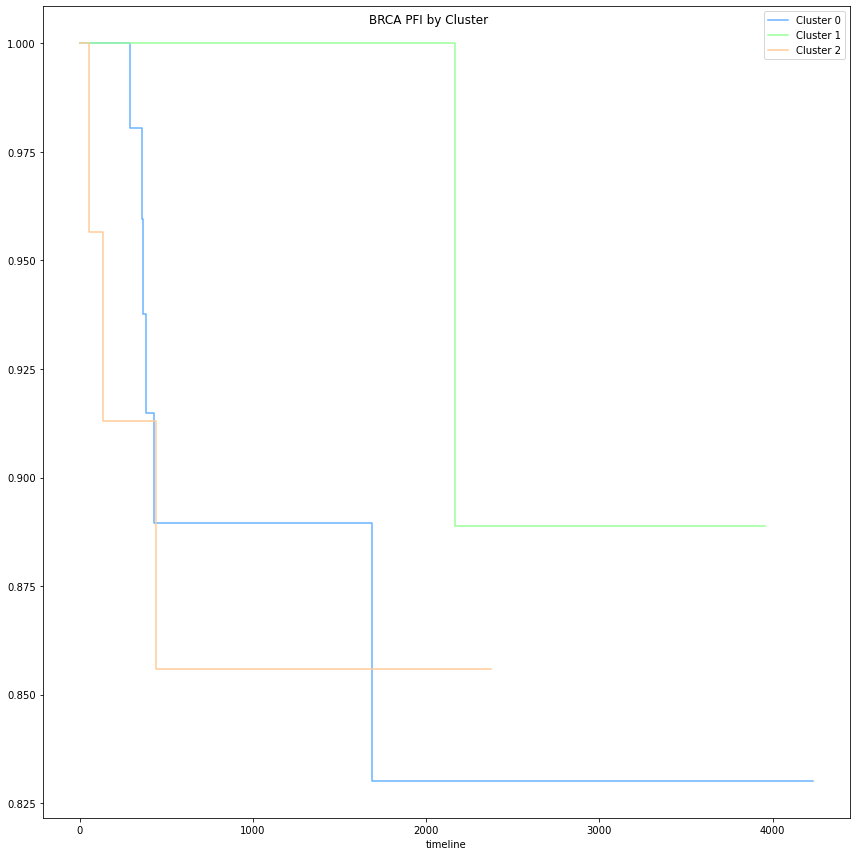

In [25]:
#plotting all cluster PFI times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[cl0], E[cl0], label="Cluster 0").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#66b3ff")

kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[cl1], E[cl1], label="Cluster 1").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#99ff99")

kmf2= KaplanMeierFitter()
ax = kmf2.fit(T[cl2], E[cl2], label="Cluster 2").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#ffcc99")
fig.suptitle("BRCA PFI by Cluster")
plt.savefig(fname = "BRCA_PFI_clusters.svg", format = "svg")
plt.tight_layout()

In [26]:
# logrank test of cluster 1 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl1], T[cl2], E[cl1], E[cl2], alpha=.95)# logrank test of cluster 1 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl1], T[cl2], E[cl1], E[cl2], alpha=.95)

results.print_summary()



<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.95 0.09      3.54

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.95 0.09      3.54

In [27]:
# logrank test of cluster 0 vs cluster 1
from lifelines.statistics import logrank_test

results = logrank_test(T[cl0], T[cl1], E[cl0], E[cl1], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.62 0.20      2.30

In [28]:
# logrank test of cluster 0 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl0], T[cl2], E[cl0], E[cl2], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.18 0.67      0.58

In [29]:
df_DSS = cluster_pheno[["Cluster", "DSS", "DSS.time"]]
df_DSS = df_DSS.dropna()
df_DSS["Cluster"].value_counts()

0    53
1    29
2    26
Name: Cluster, dtype: int64

In [30]:
cluster_pheno["Cluster"].value_counts()

0    55
1    29
2    26
Name: Cluster, dtype: int64

In [31]:
#DSS

from lifelines import KaplanMeierFitter
T = df_DSS["DSS.time"]
E = df_DSS["DSS"]
kmf = KaplanMeierFitter()
clusters = df_DSS["Cluster"]
cl0 = (clusters == 0)
cl1 = (clusters == 1) 
cl2 = (clusters == 2)

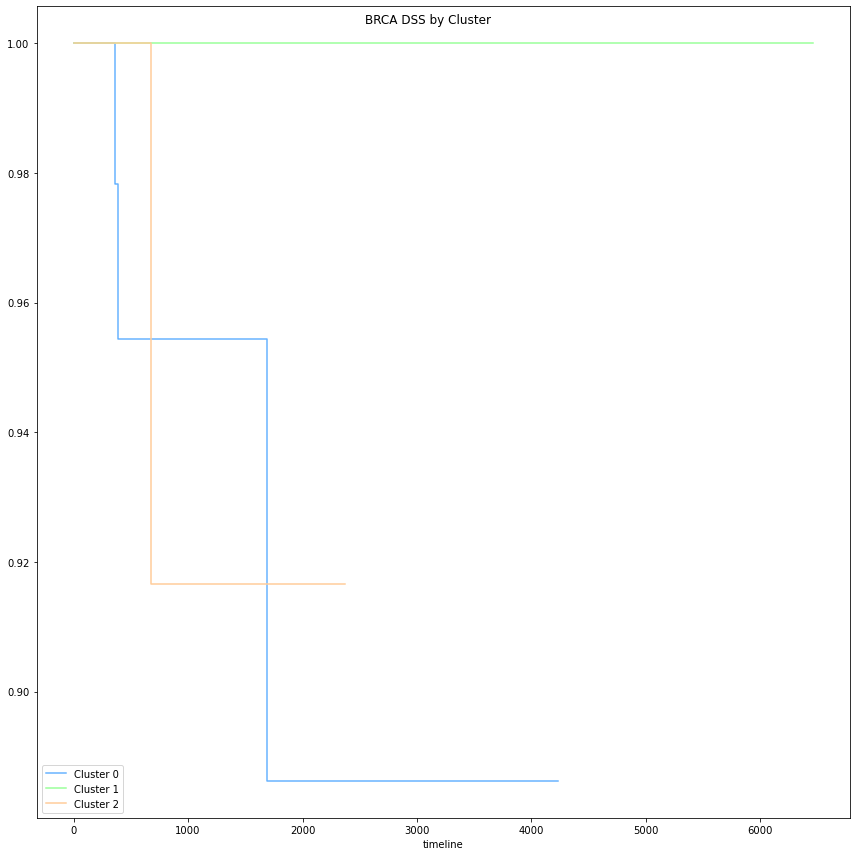

In [32]:
#plotting all cluster DSS times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[cl0], E[cl0], label="Cluster 0").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#66b3ff")

kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[cl1], E[cl1], label="Cluster 1").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#99ff99")

kmf2= KaplanMeierFitter()
ax = kmf2.fit(T[cl2], E[cl2], label="Cluster 2").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#ffcc99")
fig.suptitle("BRCA DSS by Cluster")
plt.savefig(fname = "BRCA_DSS_clusters.svg", format = "svg")
plt.tight_layout()

In [33]:
# logrank test of cluster 1 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl1], T[cl2], E[cl1], E[cl2], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.42 0.23      2.10

In [34]:
# logrank test of cluster 0 vs cluster 1
from lifelines.statistics import logrank_test

results = logrank_test(T[cl0], T[cl1], E[cl0], E[cl1], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.91 0.17      2.58

In [35]:
# logrank test of cluster 0 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl0], T[cl2], E[cl0], E[cl2], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 0.96      0.06

In [36]:
#with pd.ExcelWriter('BRCA_pheno_analysis.xlsx') as writer:
    #cluster_pheno.to_excel(writer, sheet_name='Raw')
    #gender_cluster.to_excel(writer, sheet_name='Gender')
    #age_mean_cluster.to_excel(writer, sheet_name="age_mean")
    #age_counts_cluster.to_excel(writer, sheet_name="age_counts")
    #histo_cluster.to_excel(writer, sheet_name="Histo_Subtype")
    #pT_cluster.to_excel(writer, sheet_name="pT")
    #pN_cluster.to_excel(writer, sheet_name="pN")
    #pM_cluster.to_excel(writer, sheet_name="pM")
 
    

In [37]:
X.columns

Index(['samples', 'age_at_initial_pathologic_diagnosis', 'DFI', 'DFI.time',
       'DSS', 'DSS.time', 'gender', 'histological_type', 'pathologic_M',
       'pathologic_N', 'pathologic_T', 'PFI', 'PFI.time'],
      dtype='object')

In [41]:
df_DFI = cluster_pheno[["Cluster", "DFI", "DFI.time"]]
df_DFI = df_DFI.dropna()
df_DFI["Cluster"].value_counts()

0    49
1    28
2    25
Name: Cluster, dtype: int64

In [44]:
#DFI

from lifelines import KaplanMeierFitter
T = df_DFI["DFI.time"]
E = df_DFI["DFI"]
kmf = KaplanMeierFitter()
clusters = df_DFI["Cluster"]
cl0 = (clusters == 0)
cl1 = (clusters == 1) 
cl2 = (clusters == 2)

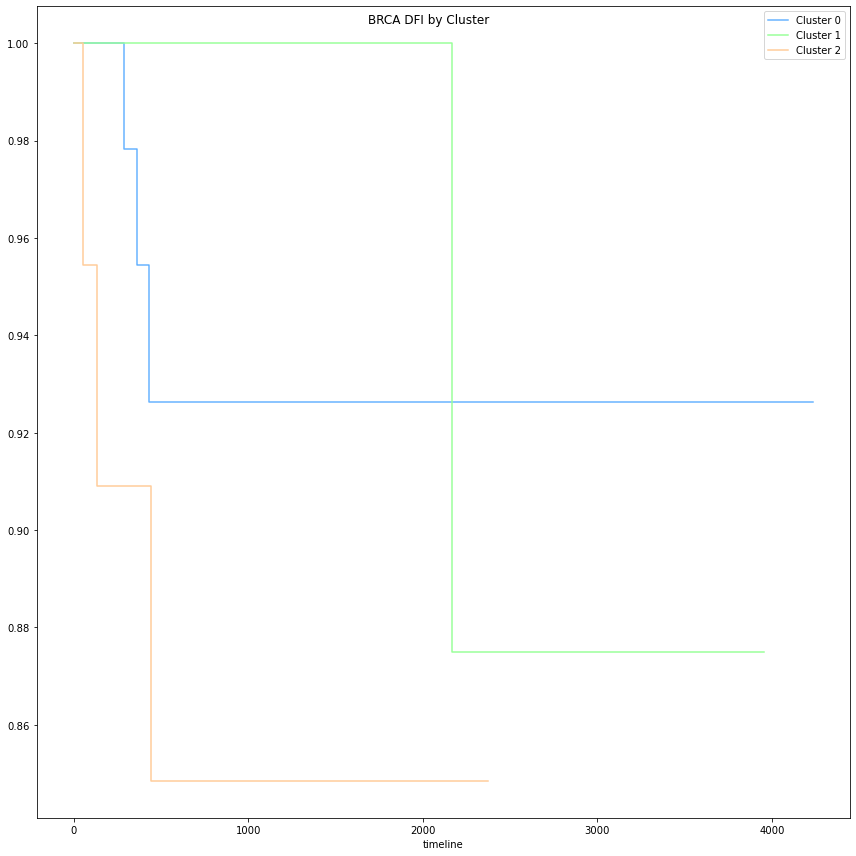

In [49]:
#plotting all cluster DFI times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[cl0], E[cl0], label="Cluster 0").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#66b3ff")

kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[cl1], E[cl1], label="Cluster 1").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#99ff99")

kmf2= KaplanMeierFitter()
ax = kmf2.fit(T[cl2], E[cl2], label="Cluster 2").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#ffcc99")
fig.suptitle("BRCA DFI by Cluster")
plt.savefig(fname = "BRCA_DFI_clusters.svg", format = "svg")
plt.tight_layout()

In [50]:
# logrank test of cluster 1 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl1], T[cl2], E[cl1], E[cl2], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.91 0.09      3.50

In [51]:
# logrank test of cluster 0 vs cluster 1
from lifelines.statistics import logrank_test

results = logrank_test(T[cl0], T[cl1], E[cl0], E[cl1], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.25 0.62      0.70

In [52]:
# logrank test of cluster 0 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl0], T[cl2], E[cl0], E[cl2], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.05 0.31      1.71